# **Clustering With K-Means**

Perform unsupervised learning with K-Means clustering.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

**Load & Explore Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df = pd.read_csv('Mall_Customers.csv')  # Adjust filename if needed
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


*Check Missing Values*

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


*Dataset Overview*

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.drop('CustomerID', axis=1, inplace=True)

**EDA**

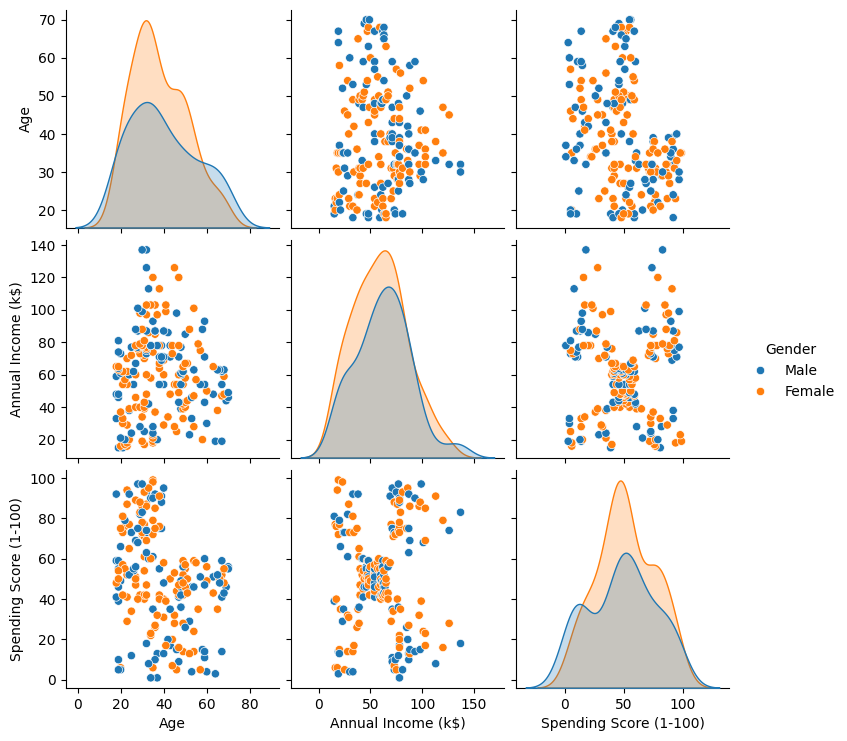

In [8]:
sns.pairplot(df, hue='Gender')  # Optional if Gender is categorical

*Heatmap*

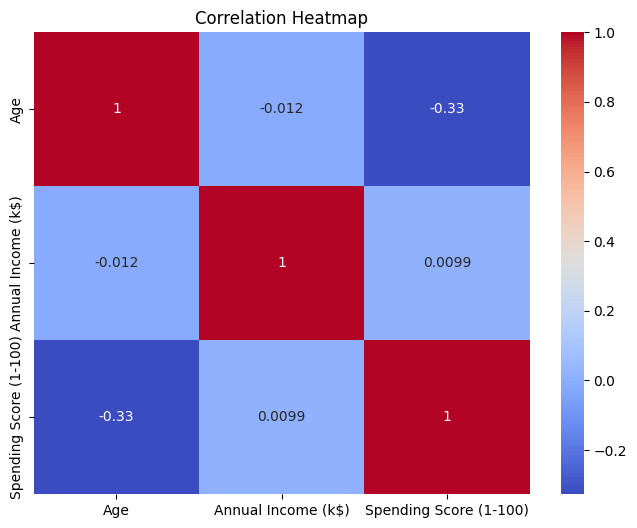

In [10]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Data Preparation**

*Encode Categorical Variables*

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

*Standardize The Data*

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

*Dimensionality Reduction For 2D Visualization*

In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

*Convert To Data Frame*

In [14]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


**Elbow Method To Find Optimal K**

In [15]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

*Plot The Elbow Curve*

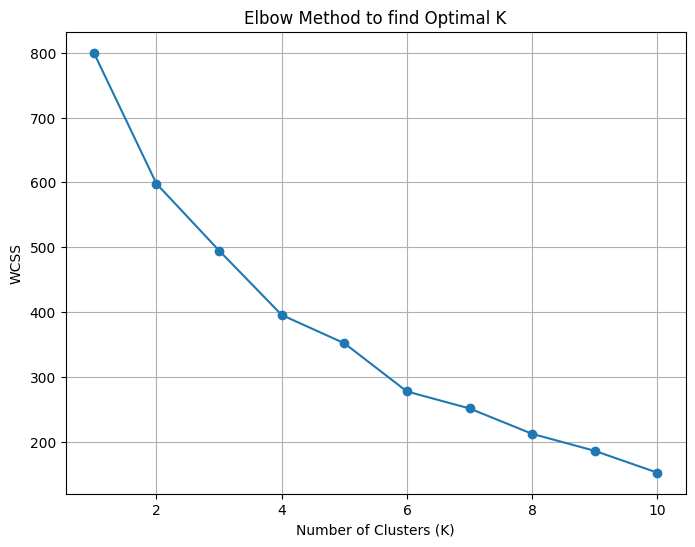

In [16]:
plt.figure(figsize=(8,6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**K-Means Clustering**

*Assuming K=5*

In [17]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

*Add Cluster Labels To Original Dataset*

In [18]:
df['Cluster'] = cluster_labels
pca_df['Cluster'] = cluster_labels

**Visualize Clusters(2D PCA)**

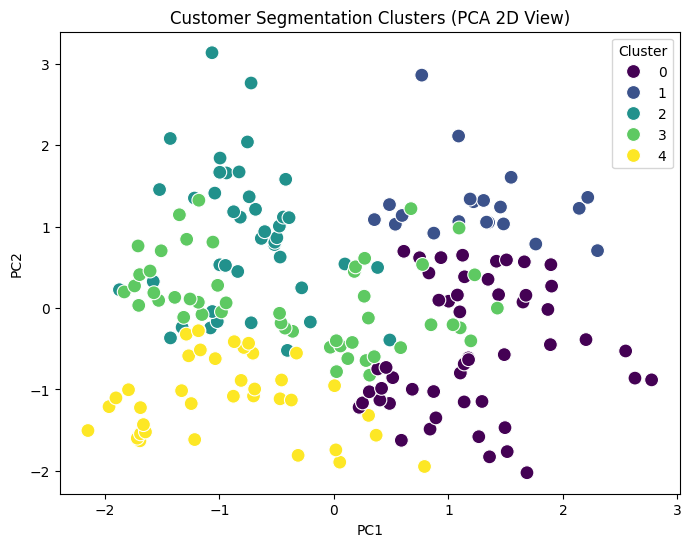

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segmentation Clusters (PCA 2D View)")
plt.show()

**Evaluate Clustering With Silhouette Score**

In [26]:
score = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.27


**Cluster Analysis**

In [27]:
df.groupby('Cluster').mean(numeric_only=True)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.490196,56.470588,46.098039,39.313725
1,0.000000,39.500000,85.150000,14.050000
2,0.000000,28.690476,60.904762,70.238095
3,1.000000,37.897959,82.122449,54.448980
4,1.000000,27.315789,38.842105,56.210526
